In [1]:
import sys
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications import resnet50
import pandas as pd
import numpy as np
import os
import cv2

model = resnet50.ResNet50(weights='imagenet') # taking input as 224 x 224 x 3 images

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
img_width = 224

In [2]:
import pandas as pd
import numpy as np
import os
import cv2

#collects all the images from the folders.
def collect_all(folder):
    images = []
    for filename in os.listdir(folder):
        if filename == 'desktop.ini':
            pass
        else:        
            #print(filename)
            im = cv2.imread(f'{folder}/{filename}')
            #print(im.shape)
            images.append(im)

    return np.array(images)

folder1 = './Data/Test'
X_test = collect_all(folder1)
folder2 = './Data/train'
X_train = collect_all(folder2)
# folder3 = './Val'
# X_val = collect_all(folder3)
y_test = pd.read_excel(r'./Data/test_label.xlsx',usecols=[1,1])

y_test = y_test.to_numpy()

y_test = np.squeeze(y_test)
y_train = pd.read_excel(r'./Data/train_label.xlsx',usecols=[1,1])

y_train = y_train.to_numpy()

y_train = np.squeeze(y_train)
# y_val = pd.read_excel(r'val_label.xlsx',header=None,usecols=[1,1])

# y_val = y_val.to_numpy()

# y_val = np.squeeze(y_val)

# mean_image = np.mean(X_train, axis=0)
# X_train = X_train.astype('float32')
# X_val = X_val.astype('float32')
# X_test = X_test.astype('float32')

# X_train -= mean_image
# X_val -= mean_image
# X_test -= mean_image

# #reshape data to rows
# X_train = X_train.reshape(X_train.shape[0], -1)
# X_val = X_val.reshape(X_val.shape[0], -1)
# X_test = X_test.reshape(X_test.shape[0], -1)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
# print('X_val shape: ', X_val.shape)
# print('y_val shape: ', y_val.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (2520, 250, 250, 3)
y_train shape:  (2520,)
X_test shape:  (280, 250, 250, 3)
y_test shape:  (280,)


In [3]:
labels = pd.read_csv('Data/train_label.csv')
labels.head()

,Unnamed: 0,id,Type
0,0,distribute_40,distribute
1,1,distribute_41,distribute
2,2,distribute_42,distribute
3,3,distribute_43,distribute
4,4,distribute_44,distribute


In [4]:
labels['Type'].value_counts()

series        360
ineq          360
limit         360
sqrt          360
distribute    360
matrix        360
integral      360
Name: Type, dtype: int64

In [5]:
sample = pd.read_csv('Data/sample_submission.csv')
sample.head()

,id,distribute,ineq,integral,limit,matrix,series,sqrt
0,distribute_40,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
1,distribute_41,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
2,distribute_42,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
3,distribute_43,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
4,distribute_44,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857


In [6]:
# num_train_images = labels.shape[0]
num_train_images = 2520  # we choose 3300 images for this assignment. It works for a machine having 8Gb Ram. You can adjust it if your Ram is different. 
split_point = 2240 # split the data into training data [0:3000] and val data [3000:]
print('num_train_images:', num_train_images)
types = sample.columns[1:]
print('Types:', types)
num_classes = len(types)
print('num_classes:', num_classes)

num_train_images: 2520
Types: Index(['distribute', 'ineq', 'integral', 'limit', 'matrix', 'series', 'sqrt'], dtype='object')
num_classes: 7


In [7]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

img_width = 224

def get_image(filename):
    ########################################################################
    # TODO: Your code here...
    ########################################################################
    original = load_img(filename, target_size=(224,224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    return image_batch[0]


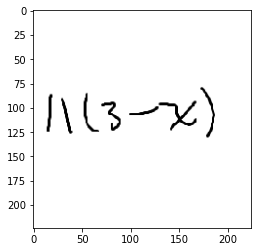

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

image = get_image('Data/train/distribute_41.png')
plt.imshow(np.uint8(image))
plt.show()

In [9]:
x_train = np.zeros((num_train_images, img_width, img_width, 3), dtype=np.uint8)
y_train = np.zeros((num_train_images, num_classes), dtype=np.uint8)

count = 0

for i in range(num_train_images):
    x_train[i] = get_image('Data/train/%s.png' % labels['id'][i])
    pos_arrays = (types == labels['Type'][i]).nonzero() # recall that types is the array of classes
    pos = pos_arrays[0][0]
    y_train[i][pos] = 1
    count += 1
    if(count % 1000 == 0): print(count, 'images loaded')

1000 images loaded
2000 images loaded


In [10]:
from tensorflow.keras.applications import resnet50

x_train = resnet50.preprocess_input(x_train) # preprocess the images properly (e.g., minus the mean image)

In [11]:
model_resnet50 = resnet50.ResNet50(weights='imagenet', include_top=False)
# include_top=False --> do not load the last FC layer

In [12]:
#x_train_test=x_train[0:3]
#x_train_test.shape
x_train.shape
#plt.imshow(np.uint8(x_train[1]))


(2520, 224, 224, 3)

In [13]:
#x_train_mini=np.expand_dims(x_train_test, axis=0)
#features = model_resnet50.predict(x_train_test, batch_size=1, verbose=1)
features = model_resnet50.predict(x_train, batch_size=64, verbose=1)

40/40 [==============================] - 360s 9s/step


In [75]:
features.shape

(2520, 7, 7, 2048)

In [14]:
# Using 7 x 7 x 2048 features as input to an FC layer leads to many parameters, and may overfit for small dataset
# Our solution is to use global pooling: pooling over every 7 x 7 images, to obtain 2048 features only
# -> ref: https://arxiv.org/pdf/1312.4400.pdf Sec 3.2

from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, Activation, BatchNormalization

# define the network
# NOTE:
# here we use "output = Layer(configs) (input)" + model(inputs, outputs)
# you may also use model.add(layer) when building your own sequential model
inputs = Input(shape = (7, 7, 2048)) # to take 7 x 7 x 2048 images
x = GlobalAveragePooling2D()(inputs) # to convert to 2048 feagures
print(x.shape)
x = Dropout(0.5)(x) # add a dropout layer
x = Dense(500)(x) # add a dense layer, but not adding activation so that we can add batch-norm first
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(0.5)(x) # add a dropout layer
# Softmax layer to the output classes
predictions = Dense(num_classes, activation='softmax')(x) # arg1 is: units = dimensionality of the output space.
print(predictions.shape)

(None, 2048)
(None, 7)


In [15]:
from tensorflow.keras.models import Model

model = Model(inputs=inputs, outputs=predictions) # specify what is network input, and what is network output
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7, 7, 2048)]      0         
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 500)               1024500   
                                                                 
 batch_normalization (BatchN  (None, 500)              2000      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 500)               0     

In [16]:
# Assign loss function (over the output), optimizer algorithm, etc.
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [17]:
# Let's use first 3000 images for training, last 300 for validation
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',  patience=3, verbose=1)
# stop if loss does not improve for 3 iterations

model.fit(features[:split_point], y_train[:split_point], batch_size=128, epochs=30, 
              validation_data=(features[split_point:], y_train[split_point:]), callbacks=[early_stop], verbose=1)

Epoch 1/30
18/18 [==============================] - 3s 89ms/step - loss: 1.4224 - accuracy: 0.5107 - val_loss: 0.4385 - val_accuracy: 0.8107
Epoch 2/30
18/18 [==============================] - 1s 75ms/step - loss: 0.7761 - accuracy: 0.7321 - val_loss: 0.0923 - val_accuracy: 0.9679
Epoch 3/30
18/18 [==============================] - 1s 73ms/step - loss: 0.6124 - accuracy: 0.7723 - val_loss: 0.0647 - val_accuracy: 0.9821
Epoch 4/30
18/18 [==============================] - 1s 78ms/step - loss: 0.5152 - accuracy: 0.8112 - val_loss: 0.0668 - val_accuracy: 0.9893
Epoch 5/30
18/18 [==============================] - 2s 113ms/step - loss: 0.4714 - accuracy: 0.8183 - val_loss: 0.0640 - val_accuracy: 0.9893
Epoch 6/30
18/18 [==============================] - 2s 107ms/step - loss: 0.4252 - accuracy: 0.8585 - val_loss: 0.0345 - val_accuracy: 0.9929
Epoch 7/30
18/18 [==============================] - 2s 100ms/step - loss: 0.3848 - accuracy: 0.8625 - val_loss: 0.0451 - val_accuracy: 0.9929
Epoch 8/30

In [18]:
# save it to disk
model.save('model1.h5') # you may try load_model.ipynb to see how it's loaded (not required)

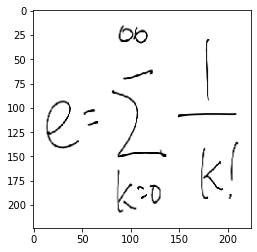

In [19]:
test_img = get_image('Data/Test_2/series_16.png')
plt.imshow(np.uint8(test_img))
plt.show()

In [20]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

image_batch = np.expand_dims(test_img, axis=0)
image_batch = np.copy(image_batch)

image_batch = resnet50.preprocess_input(image_batch)
feature_input = model_resnet50.predict(image_batch)
predictions = model.predict(feature_input)
pos = np.argmax(predictions)
types[pos]

'series'

In [21]:

for files in os.listdir('./Data/Test_3/'):
    
    if files== 'desktop.ini':
        pass
    else:    
        test_img = get_image(f'Data/Test_3/{files}')
        image_batch = np.expand_dims(test_img, axis=0)
        image_batch = np.copy(image_batch)
        image_batch = resnet50.preprocess_input(image_batch)
        feature_input = model_resnet50.predict(image_batch)
        predictions = model.predict(feature_input)
        pos = np.argmax(predictions)

        print('Image Name: ',files,' Prediction: ',types[pos])


Image Name:  f_dist_1.png  Prediction:  distribute
Image Name:  f_ineq.png  Prediction:  ineq
Image Name:  f_int.png  Prediction:  distribute
Image Name:  f_lim.png  Prediction:  distribute
Image Name:  f_matrix.png  Prediction:  matrix
Image Name:  f_series.png  Prediction:  series
Image Name:  f_sqrt.png  Prediction:  sqrt
Image Name:  s_dist3.png  Prediction:  ineq
Image Name:  s_ineq3.png  Prediction:  ineq
Image Name:  s_int3.png  Prediction:  integral
Image Name:  s_limit3.png  Prediction:  limit
Image Name:  s_matrix3.png  Prediction:  matrix
Image Name:  s_series3.png  Prediction:  series
Image Name:  s_sqrt3.png  Prediction:  sqrt
Image Name:  T_dist2.png  Prediction:  ineq
Image Name:  t_ineq2.png  Prediction:  ineq
Image Name:  t_int2.png  Prediction:  integral
Image Name:  t_lim2.png  Prediction:  limit
Image Name:  t_matrix2.png  Prediction:  integral
Image Name:  t_series2.png  Prediction:  ineq
Image Name:  t_sqrt2.png  Prediction:  sqrt


In [57]:
########################################################################
# TODO: Your code here...
########################################################################
from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications import vgg16

#getting the features of all three models

#Resnet50 - last layer of features
resnet50_x_train = resnet50.preprocess_input(x_train.copy())
resnet50_model = resnet50.ResNet50(weights='imagenet', include_top=False)
resnet50_features = resnet50_model.predict(resnet50_x_train, batch_size=64, verbose=1)
print(resnet50_features.shape)


# #InceptionV3
# inceptionV3_x_train = inception_v3.preprocess_input(x_train.copy())
# inceptionV3_model = inception_v3.InceptionV3(weights='imagenet', include_top=False)
# inceptionV3_features = inceptionV3_model.predict(inceptionV3_x_train, batch_size=64, verbose=1)
# print(inceptionV3_features.shape)


#vgg16
vgg16_x_train = vgg16.preprocess_input(x_train.copy())
vgg16_model = vgg16.VGG16(weights='imagenet', include_top=False)
vgg16_features = vgg16_model.predict(vgg16_x_train, batch_size=64, verbose=1)
print(vgg16_features.shape)

40/40 [==============================] - 190s 5s/step
(2520, 7, 7, 2048)
40/40 [==============================] - 461s 11s/step
(2520, 7, 7, 512)


In [59]:
#Concatenating resnet50 and vgg16

concat = np.concatenate([resnet50_features, vgg16_features],axis=3)
print(concat.shape)

new_model_in = Input(shape=(7,7,2560)) 
mrg = GlobalAveragePooling2D()(new_model_in)
mrg = Dropout(0.5)(mrg)
mrg = Dense(500)(mrg) # add a dense layer, but not adding activation so that we can add batch-norm first
mrg = BatchNormalization()(mrg)
mrg = Activation("relu")(mrg)
mrg = Dropout(0.5)(mrg) # add a dropout layer
# Softmax layer to the output classes
predictions = Dense(num_classes, activation='softmax')(mrg)
print(predictions.shape)
#model_final=Model(inputs=[model1.input,model2.input],outputs=predictions)
new_model = Model(inputs=new_model_in,outputs=predictions)
new_model.summary()

(2520, 7, 7, 2560)
(None, 7)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 7, 7, 2560)]      0         
                                                                 
 global_average_pooling2d_2   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 2560)              0         
                                                                 
 dense_4 (Dense)             (None, 500)               1280500   
                                                                 
 batch_normalization_2 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (

In [60]:
new_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [61]:
early_stop = EarlyStopping(monitor='val_loss',  patience=3, verbose=1)
# stop if loss does not improve for 3 iterations
new_model.fit(concat[:split_point], y_train[:split_point], batch_size=128, epochs=30, 
              validation_data=(concat[split_point:], y_train[split_point:]), callbacks=[early_stop], verbose=1)

Epoch 1/30
18/18 [==============================] - 2s 52ms/step - loss: 1.3857 - accuracy: 0.5188 - val_loss: 0.1662 - val_accuracy: 0.9571
Epoch 2/30
18/18 [==============================] - 1s 51ms/step - loss: 0.6333 - accuracy: 0.7741 - val_loss: 0.0227 - val_accuracy: 0.9964
Epoch 3/30
18/18 [==============================] - 1s 49ms/step - loss: 0.5065 - accuracy: 0.8179 - val_loss: 0.0239 - val_accuracy: 0.9964
Epoch 4/30
18/18 [==============================] - 1s 49ms/step - loss: 0.4418 - accuracy: 0.8473 - val_loss: 0.0201 - val_accuracy: 0.9964
Epoch 5/30
18/18 [==============================] - 1s 54ms/step - loss: 0.3840 - accuracy: 0.8687 - val_loss: 0.0163 - val_accuracy: 0.9964
Epoch 6/30
18/18 [==============================] - 1s 46ms/step - loss: 0.3407 - accuracy: 0.8795 - val_loss: 0.0173 - val_accuracy: 0.9929
Epoch 7/30
18/18 [==============================] - 1s 47ms/step - loss: 0.3371 - accuracy: 0.8839 - val_loss: 0.0172 - val_accuracy: 0.9929
Epoch 8/30
18

In [62]:

for files in os.listdir('./Data/Test_3/'):
    
    if files== 'desktop.ini':
        pass
    else:    
        test_img = get_image(f'Data/Test_3/{files}')
        image_batch = np.expand_dims(test_img, axis=0)
        image_batch = np.copy(image_batch)
        image_batch = resnet50.preprocess_input(image_batch)
        feature_input = model_resnet50.predict(image_batch)
        predictions = model.predict(feature_input)
        pos = np.argmax(predictions)

        print('Image Name: ',files,' Prediction: ',types[pos])


Image Name:  f_dist_1.png  Prediction:  distribute
Image Name:  f_ineq.png  Prediction:  ineq
Image Name:  f_int.png  Prediction:  distribute
Image Name:  f_lim.png  Prediction:  distribute
Image Name:  f_matrix.png  Prediction:  matrix
Image Name:  f_series.png  Prediction:  series
Image Name:  f_sqrt.png  Prediction:  sqrt
Image Name:  s_dist3.png  Prediction:  ineq
Image Name:  s_ineq3.png  Prediction:  ineq
Image Name:  s_int3.png  Prediction:  integral
Image Name:  s_limit3.png  Prediction:  ineq
Image Name:  s_matrix3.png  Prediction:  matrix
Image Name:  s_series3.png  Prediction:  distribute
Image Name:  s_sqrt3.png  Prediction:  sqrt
Image Name:  T_dist2.png  Prediction:  ineq
Image Name:  t_ineq2.png  Prediction:  ineq
Image Name:  t_int2.png  Prediction:  integral
Image Name:  t_lim2.png  Prediction:  limit
Image Name:  t_matrix2.png  Prediction:  integral
Image Name:  t_series2.png  Prediction:  ineq
Image Name:  t_sqrt2.png  Prediction:  sqrt
